In [2]:
#!pip install librosa --user
#!pip install mock
#!pip install llvmlite

In [2]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import math
import tqdm
import soundfile as sf
import pandas as pd
import json
import shutil

# Urban Sounds 8K

In [3]:
#UrbanSounds 8k 
inpath = 'UrbanSound8K/audio/'
outpath ='UrbanSound8K/awgn_noisy_audio/'

### Adding Noise 

In [53]:
#Additive White Gaussian Noise (AWGN)
for folder in tqdm.tqdm(os.listdir(inpath)):
    if not folder.startswith('.'): 
        for file in os.listdir(inpath+folder):
            if not file.startswith('.'): 
                signal, sr = librosa.load(inpath+folder+'/'+file)
                RMS=math.sqrt(np.mean(signal**2))
                #Creating Noise
                noise=np.random.normal(0, 0.02, signal.shape[0])
                #Adding Noise
                signal_noise = signal+noise
                if not os.path.exists(outpath+folder):
                    os.makedirs(outpath+folder)
                sf.write(outpath+folder+'/'+file, signal_noise, sr, subtype='PCM_24')

100%|██████████| 11/11 [17:37<00:00, 103.44s/it]


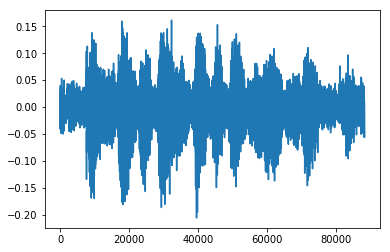

In [12]:
plt.plot(signal)

In [38]:
noise=np.random.normal(0, 0.02, signal.shape[0])

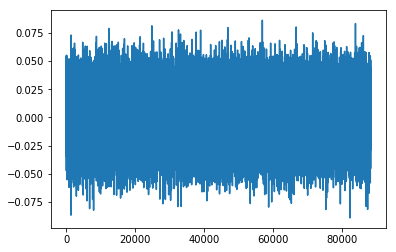

In [39]:
plt.plot(noise)

In [40]:
signal_noise = signal+noise

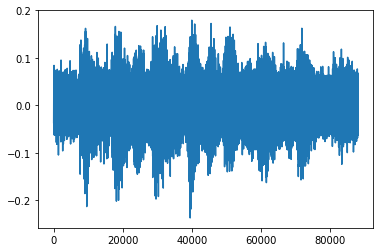

In [41]:
plt.plot(signal_noise)

# Converting to Mel Spectograms

In [63]:
def convert_to_mel(filepath,outpath):
    # print('Converting to mel started')
    # Loading the audio wave data using librosa
    data, sample_rate = librosa.load(filepath)
    # print(f'data shape = {data.shape} and sample rate = {sample_rate}')
    # Computing the spectogram
    sgram = librosa.stft(data)

    # use the mel-scale instead of raw frequency
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)

    # use the decibel scale to get the final Mel Spectrogram
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    # librosa.display.specshow(mel_sgram, sr=sample_rate, x_axis='time', y_axis='mel')
    # plt.colorbar(format='%+2.0f dB')
    # print(mel_sgram)
    _ = librosa.display.specshow(mel_sgram, sr=sample_rate)
    # print('Able to finish till the sepctogram')
    plt.axis('off')
    plt.savefig(outpath,bbox_inches='tight',  pad_inches=0)
    plt.clf()
    # transparent="True",

In [4]:
#Urban Sounds 8k
noisy_mel = 'UrbanSound8K/noisy_mel/'
mel = 'UrbanSound8K/audio_mel/'

In [74]:
#Urban Sounds 8k
#Normal
for folder in tqdm.tqdm(os.listdir(inpath)):
    if not folder.startswith('.'): 
        for file in os.listdir(inpath+folder):
            if not file.startswith('.'): 
                if not os.path.exists(mel+folder):
                    os.makedirs(mel+folder)
                #print(file.split('.')[0]+'.png')
                convert_to_mel(inpath+folder+'/'+file,mel+folder+'/'+file.split('.')[0]+'.png')
                #print(file)



  0%|          | 0/11 [00:00<?, ?it/s]

  9%|▉         | 1/11 [04:19<43:16, 259.69s/it]

 18%|█▊        | 2/11 [08:19<38:03, 253.67s/it]

 27%|██▋       | 3/11 [12:53<34:39, 259.95s/it]

 36%|███▋      | 4/11 [17:36<31:06, 266.63s/it]

 45%|████▌     | 5/11 [21:56<26:29, 264.87s/it]

 64%|██████▎   | 7/11 [26:25<15:02, 225.75s/it]

 73%|███████▎  | 8/11 [31:15<12:14, 244.85s/it]

 82%|████████▏ | 9/11 [36:39<08:57, 268.64s/it]

 91%|█████████ | 10/11 [41:14<04:30, 270.68s/it]

100%|██████████| 11/11 [45:51<00:00, 272.35s/it]

<Figure size 432x288 with 0 Axes>

In [73]:
#Urban Sounds 8k
#Noisy
for folder in tqdm.tqdm(os.listdir(outpath)):
    if not folder.startswith('.'): 
        for file in os.listdir(outpath+folder):
            if not file.startswith('.'): 
                if not os.path.exists(noisy_mel+folder):
                    os.makedirs(noisy_mel+folder)
                #print(file.split('.')[0]+'.png')
                convert_to_mel(outpath+folder+'/'+file,noisy_mel+folder+'/'+file.split('.')[0]+'.png')
                #print(file)



  0%|          | 0/10 [00:00<?, ?it/s]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)


 10%|█         | 1/10 [02:37<23:34, 157.14s/it]

 20%|██        | 2/10 [05:07<20:40, 155.10s/it]

 30%|███       | 3/10 [08:01<18:45, 160.82s/it]

 40%|████      | 4/10 [11:00<16:37, 166.23s/it]

 50%|█████     | 5/10 [13:38<13:38, 163.70s/it]

 60%|██████    | 6/10 [16:26<11:00, 165.04s/it]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


 70%|███████   | 7/10 [19:24<08:26, 168.98s/it]

 80%|████████  | 8/10 [22:46<05:57, 178.97s/it]

 90%|█████████ | 9/10 [25:42<02:

<Figure size 432x288 with 0 Axes>

In [5]:
#TORGO
normal = 'Disease/16bitMono_Control/'
disease = 'Disease/16bitMono_Dys/'
normal_mel = 'Disease/control_mel/'
disease_mel = 'Disease/dys_mel/'

In [89]:
#Normal
for file in tqdm.tqdm(os.listdir(normal)):
    if not file.startswith('.'):
        #print(file.split('.')[0]+'.png')
        try:
            convert_to_mel(normal+file,normal_mel+file.split('.')[0]+'.png')
        except:
            print(file)




  0%|          | 0/2762 [00:00<?, ?it/s]


  0%|          | 1/2762 [00:00<08:34,  5.37it/s]


  0%|          | 2/2762 [00:00<09:08,  5.03it/s]


  0%|          | 3/2762 [00:00<09:06,  5.05it/s]


  0%|          | 4/2762 [00:00<09:18,  4.94it/s]


  0%|          | 5/2762 [00:01<09:11,  4.99it/s]


  0%|          | 6/2762 [00:01<09:59,  4.59it/s]


  0%|          | 7/2762 [00:01<10:10,  4.51it/s]


  0%|          | 8/2762 [00:01<09:44,  4.71it/s]


  0%|          | 9/2762 [00:01<09:41,  4.74it/s]


  0%|          | 10/2762 [00:02<09:27,  4.85it/s]


  0%|          | 11/2762 [00:02<09:21,  4.90it/s]


  0%|          | 12/2762 [00:02<09:16,  4.94it/s]


  0%|          | 13/2762 [00:02<09:17,  4.93it/s]


  1%|          | 14/2762 [00:02<09:36,  4.77it/s]


  1%|          | 15/2762 [00:03<10:26,  4.38it/s]


  1%|          | 16/2762 [00:03<10:03,  4.55it/s]


  1%|          | 17/2762 [00:03<10:49,  4.23it/s]


  1%|          | 18/2762 [00:03<09:48,  4.66it/s]


  1%|          | 19/2762 [0

  5%|▍         | 134/2762 [00:28<09:24,  4.65it/s]


  5%|▍         | 135/2762 [00:28<09:21,  4.67it/s]


  5%|▍         | 136/2762 [00:29<09:12,  4.75it/s]


  5%|▍         | 137/2762 [00:29<10:32,  4.15it/s]


  5%|▍         | 138/2762 [00:29<09:43,  4.50it/s]


  5%|▌         | 139/2762 [00:29<09:36,  4.55it/s]


  5%|▌         | 140/2762 [00:29<08:55,  4.89it/s]


  5%|▌         | 141/2762 [00:30<08:26,  5.17it/s]


  5%|▌         | 142/2762 [00:30<08:39,  5.04it/s]


  5%|▌         | 143/2762 [00:30<08:48,  4.95it/s]


  5%|▌         | 144/2762 [00:30<08:24,  5.19it/s]


  5%|▌         | 145/2762 [00:31<08:04,  5.40it/s]


  5%|▌         | 146/2762 [00:31<10:51,  4.01it/s]


  5%|▌         | 147/2762 [00:31<10:36,  4.11it/s]


  5%|▌         | 148/2762 [00:31<10:58,  3.97it/s]


  5%|▌         | 149/2762 [00:32<11:10,  3.90it/s]


  5%|▌         | 150/2762 [00:32<10:25,  4.17it/s]


  5%|▌         | 151/2762 [00:32<11:53,  3.66it/s]


  6%|▌         | 152/2762 [00:32<10:57,  3.97i

 10%|▉         | 266/2762 [00:56<10:01,  4.15it/s]


 10%|▉         | 267/2762 [00:57<09:37,  4.32it/s]


 10%|▉         | 268/2762 [00:57<09:31,  4.37it/s]


 10%|▉         | 269/2762 [00:57<08:48,  4.72it/s]


 10%|▉         | 270/2762 [00:57<08:56,  4.65it/s]


 10%|▉         | 271/2762 [00:57<09:06,  4.56it/s]


 10%|▉         | 272/2762 [00:58<08:50,  4.69it/s]


 10%|▉         | 273/2762 [00:58<09:28,  4.38it/s]


 10%|▉         | 274/2762 [00:58<09:36,  4.32it/s]


 10%|▉         | 275/2762 [00:58<09:05,  4.56it/s]


 10%|▉         | 276/2762 [00:59<09:20,  4.44it/s]


 10%|█         | 277/2762 [00:59<09:33,  4.34it/s]


 10%|█         | 278/2762 [00:59<09:37,  4.30it/s]


 10%|█         | 279/2762 [00:59<09:36,  4.30it/s]


 10%|█         | 280/2762 [01:00<09:54,  4.18it/s]


 10%|█         | 281/2762 [01:00<10:02,  4.12it/s]


 10%|█         | 282/2762 [01:00<09:34,  4.32it/s]


 10%|█         | 283/2762 [01:00<09:27,  4.36it/s]


 10%|█         | 284/2762 [01:00<09:27,  4.36i

 14%|█▍        | 398/2762 [01:25<08:39,  4.55it/s]


 14%|█▍        | 399/2762 [01:26<08:05,  4.86it/s]


 14%|█▍        | 400/2762 [01:26<08:59,  4.38it/s]


 15%|█▍        | 401/2762 [01:26<09:23,  4.19it/s]


 15%|█▍        | 402/2762 [01:26<09:03,  4.34it/s]


 15%|█▍        | 403/2762 [01:27<08:16,  4.75it/s]


 15%|█▍        | 404/2762 [01:27<08:38,  4.55it/s]


 15%|█▍        | 405/2762 [01:27<08:45,  4.48it/s]


 15%|█▍        | 406/2762 [01:27<08:16,  4.74it/s]


 15%|█▍        | 407/2762 [01:27<08:49,  4.44it/s]


 15%|█▍        | 408/2762 [01:28<08:48,  4.45it/s]


 15%|█▍        | 409/2762 [01:28<08:42,  4.51it/s]


 15%|█▍        | 410/2762 [01:28<08:20,  4.70it/s]


 15%|█▍        | 411/2762 [01:28<08:18,  4.72it/s]


 15%|█▍        | 412/2762 [01:29<08:27,  4.63it/s]


 15%|█▍        | 413/2762 [01:29<08:14,  4.75it/s]


 15%|█▍        | 414/2762 [01:29<08:03,  4.86it/s]


 15%|█▌        | 415/2762 [01:29<08:49,  4.43it/s]


 15%|█▌        | 416/2762 [01:29<09:23,  4.16i

 19%|█▉        | 530/2762 [01:55<08:16,  4.49it/s]


 19%|█▉        | 531/2762 [01:55<07:48,  4.76it/s]


 19%|█▉        | 532/2762 [01:55<07:37,  4.88it/s]


 19%|█▉        | 533/2762 [01:56<08:49,  4.21it/s]


 19%|█▉        | 534/2762 [01:56<08:04,  4.60it/s]


 19%|█▉        | 535/2762 [01:56<08:36,  4.31it/s]


 19%|█▉        | 536/2762 [01:56<08:34,  4.33it/s]


 19%|█▉        | 537/2762 [01:56<08:39,  4.28it/s]


 19%|█▉        | 538/2762 [01:57<08:17,  4.47it/s]


 20%|█▉        | 539/2762 [01:57<07:44,  4.78it/s]


 20%|█▉        | 540/2762 [01:57<08:12,  4.51it/s]


 20%|█▉        | 541/2762 [01:57<08:05,  4.57it/s]


 20%|█▉        | 542/2762 [01:58<08:24,  4.40it/s]


 20%|█▉        | 543/2762 [01:58<08:12,  4.50it/s]


 20%|█▉        | 544/2762 [01:58<08:34,  4.31it/s]


 20%|█▉        | 545/2762 [01:58<08:13,  4.49it/s]


 20%|█▉        | 546/2762 [01:58<08:01,  4.61it/s]


 20%|█▉        | 547/2762 [01:59<07:49,  4.72it/s]


 20%|█▉        | 548/2762 [01:59<07:22,  5.00i

 24%|██▍       | 662/2762 [02:25<09:05,  3.85it/s]


 24%|██▍       | 663/2762 [02:25<08:37,  4.06it/s]


 24%|██▍       | 664/2762 [02:25<08:08,  4.30it/s]


 24%|██▍       | 665/2762 [02:25<08:45,  3.99it/s]


 24%|██▍       | 666/2762 [02:26<08:33,  4.09it/s]


 24%|██▍       | 667/2762 [02:26<08:29,  4.11it/s]


 24%|██▍       | 668/2762 [02:26<07:54,  4.41it/s]


 24%|██▍       | 669/2762 [02:26<07:19,  4.76it/s]


 24%|██▍       | 670/2762 [02:26<07:14,  4.81it/s]


 24%|██▍       | 671/2762 [02:27<07:31,  4.63it/s]


 24%|██▍       | 672/2762 [02:27<07:28,  4.66it/s]


 24%|██▍       | 673/2762 [02:27<06:58,  4.99it/s]


 24%|██▍       | 674/2762 [02:27<07:46,  4.48it/s]


 24%|██▍       | 675/2762 [02:28<08:46,  3.97it/s]


 24%|██▍       | 676/2762 [02:28<07:58,  4.36it/s]


 25%|██▍       | 677/2762 [02:28<07:24,  4.69it/s]


 25%|██▍       | 678/2762 [02:28<07:46,  4.47it/s]


 25%|██▍       | 679/2762 [02:28<07:38,  4.54it/s]


 25%|██▍       | 680/2762 [02:29<07:47,  4.46i

 29%|██▊       | 794/2762 [02:54<07:35,  4.32it/s]


 29%|██▉       | 795/2762 [02:54<07:36,  4.31it/s]


 29%|██▉       | 796/2762 [02:54<07:15,  4.51it/s]


 29%|██▉       | 797/2762 [02:54<07:38,  4.28it/s]


 29%|██▉       | 798/2762 [02:55<07:50,  4.18it/s]


 29%|██▉       | 799/2762 [02:55<07:44,  4.23it/s]


 29%|██▉       | 800/2762 [02:55<07:14,  4.52it/s]


 29%|██▉       | 801/2762 [02:55<07:19,  4.47it/s]


 29%|██▉       | 802/2762 [02:55<07:43,  4.23it/s]


 29%|██▉       | 803/2762 [02:56<07:49,  4.17it/s]


 29%|██▉       | 804/2762 [02:56<07:07,  4.58it/s]


 29%|██▉       | 805/2762 [02:56<06:56,  4.70it/s]


 29%|██▉       | 806/2762 [02:56<08:08,  4.00it/s]


 29%|██▉       | 807/2762 [02:57<08:00,  4.07it/s]


 29%|██▉       | 808/2762 [02:57<08:26,  3.86it/s]


 29%|██▉       | 809/2762 [02:57<08:07,  4.00it/s]


 29%|██▉       | 810/2762 [02:57<07:24,  4.40it/s]


 29%|██▉       | 811/2762 [02:58<07:33,  4.30it/s]


 29%|██▉       | 812/2762 [02:58<07:18,  4.45i

 34%|███▎      | 926/2762 [03:23<06:15,  4.88it/s]


 34%|███▎      | 927/2762 [03:23<06:11,  4.94it/s]


 34%|███▎      | 928/2762 [03:23<06:08,  4.98it/s]


 34%|███▎      | 929/2762 [03:23<06:26,  4.74it/s]


 34%|███▎      | 930/2762 [03:23<06:12,  4.92it/s]


 34%|███▎      | 931/2762 [03:24<07:40,  3.97it/s]


 34%|███▎      | 932/2762 [03:24<08:38,  3.53it/s]


 34%|███▍      | 933/2762 [03:24<08:36,  3.54it/s]


 34%|███▍      | 934/2762 [03:25<07:51,  3.88it/s]


 34%|███▍      | 935/2762 [03:25<07:48,  3.90it/s]


 34%|███▍      | 936/2762 [03:25<07:09,  4.26it/s]


 34%|███▍      | 937/2762 [03:25<07:04,  4.30it/s]


 34%|███▍      | 938/2762 [03:26<06:53,  4.41it/s]


 34%|███▍      | 939/2762 [03:26<07:19,  4.14it/s]


 34%|███▍      | 940/2762 [03:26<06:54,  4.39it/s]


 34%|███▍      | 941/2762 [03:26<06:27,  4.70it/s]


 34%|███▍      | 942/2762 [03:26<06:58,  4.34it/s]


 34%|███▍      | 943/2762 [03:27<06:57,  4.36it/s]


 34%|███▍      | 944/2762 [03:27<07:53,  3.84i

 38%|███▊      | 1057/2762 [03:52<05:40,  5.01it/s]


 38%|███▊      | 1058/2762 [03:53<06:16,  4.53it/s]


 38%|███▊      | 1059/2762 [03:53<06:16,  4.53it/s]


 38%|███▊      | 1060/2762 [03:53<05:50,  4.85it/s]


 38%|███▊      | 1061/2762 [03:53<05:58,  4.74it/s]


 38%|███▊      | 1062/2762 [03:54<05:59,  4.72it/s]


 38%|███▊      | 1063/2762 [03:54<06:59,  4.05it/s]


 39%|███▊      | 1064/2762 [03:54<06:28,  4.37it/s]


 39%|███▊      | 1065/2762 [03:54<06:40,  4.23it/s]


 39%|███▊      | 1066/2762 [03:55<07:13,  3.91it/s]


 39%|███▊      | 1067/2762 [03:55<07:09,  3.95it/s]


 39%|███▊      | 1068/2762 [03:55<06:51,  4.12it/s]


 39%|███▊      | 1069/2762 [03:55<06:33,  4.31it/s]


 39%|███▊      | 1070/2762 [03:56<06:46,  4.16it/s]


 39%|███▉      | 1071/2762 [03:56<06:36,  4.27it/s]


 39%|███▉      | 1072/2762 [03:56<06:07,  4.60it/s]


 39%|███▉      | 1073/2762 [03:56<07:13,  3.89it/s]


 39%|███▉      | 1074/2762 [03:56<06:36,  4.26it/s]


 39%|███▉      | 1075/2762 [

 43%|████▎     | 1187/2762 [04:22<06:08,  4.28it/s]


 43%|████▎     | 1188/2762 [04:22<06:01,  4.36it/s]


 43%|████▎     | 1189/2762 [04:22<05:59,  4.38it/s]


 43%|████▎     | 1190/2762 [04:22<05:34,  4.70it/s]


 43%|████▎     | 1191/2762 [04:22<05:48,  4.51it/s]


 43%|████▎     | 1192/2762 [04:23<05:44,  4.55it/s]


 43%|████▎     | 1193/2762 [04:23<05:30,  4.74it/s]


 43%|████▎     | 1194/2762 [04:23<05:42,  4.57it/s]


 43%|████▎     | 1195/2762 [04:23<05:47,  4.52it/s]


 43%|████▎     | 1196/2762 [04:24<06:03,  4.31it/s]


 43%|████▎     | 1197/2762 [04:24<05:47,  4.50it/s]


 43%|████▎     | 1198/2762 [04:24<05:36,  4.64it/s]


 43%|████▎     | 1199/2762 [04:24<05:28,  4.76it/s]


 43%|████▎     | 1200/2762 [04:24<05:16,  4.93it/s]


 43%|████▎     | 1201/2762 [04:25<05:23,  4.83it/s]


 44%|████▎     | 1202/2762 [04:25<05:08,  5.06it/s]


 44%|████▎     | 1203/2762 [04:25<05:26,  4.77it/s]


 44%|████▎     | 1204/2762 [04:25<05:23,  4.81it/s]


 44%|████▎     | 1205/2762 [

 48%|████▊     | 1317/2762 [04:50<05:27,  4.41it/s]


 48%|████▊     | 1318/2762 [04:50<05:37,  4.27it/s]


 48%|████▊     | 1319/2762 [04:50<05:10,  4.65it/s]


 48%|████▊     | 1320/2762 [04:51<05:11,  4.63it/s]


 48%|████▊     | 1321/2762 [04:51<05:25,  4.43it/s]


 48%|████▊     | 1322/2762 [04:51<05:03,  4.74it/s]


 48%|████▊     | 1323/2762 [04:51<05:12,  4.61it/s]


 48%|████▊     | 1324/2762 [04:52<05:11,  4.62it/s]


 48%|████▊     | 1325/2762 [04:52<04:57,  4.84it/s]


 48%|████▊     | 1326/2762 [04:52<05:04,  4.71it/s]


 48%|████▊     | 1327/2762 [04:52<04:46,  5.00it/s]


 48%|████▊     | 1328/2762 [04:52<04:50,  4.94it/s]


 48%|████▊     | 1329/2762 [04:53<05:03,  4.72it/s]


 48%|████▊     | 1330/2762 [04:53<04:45,  5.01it/s]


 48%|████▊     | 1331/2762 [04:53<05:19,  4.48it/s]


 48%|████▊     | 1332/2762 [04:53<05:47,  4.11it/s]


 48%|████▊     | 1333/2762 [04:54<05:47,  4.11it/s]


 48%|████▊     | 1334/2762 [04:54<05:46,  4.12it/s]


 48%|████▊     | 1335/2762 [

 52%|█████▏    | 1447/2762 [05:19<04:48,  4.56it/s]


 52%|█████▏    | 1448/2762 [05:19<04:43,  4.63it/s]


 52%|█████▏    | 1449/2762 [05:19<04:46,  4.58it/s]


 52%|█████▏    | 1450/2762 [05:20<04:33,  4.80it/s]


 53%|█████▎    | 1451/2762 [05:20<05:18,  4.12it/s]


 53%|█████▎    | 1452/2762 [05:20<05:38,  3.86it/s]


 53%|█████▎    | 1453/2762 [05:20<05:37,  3.88it/s]


 53%|█████▎    | 1454/2762 [05:21<04:58,  4.39it/s]


 53%|█████▎    | 1455/2762 [05:21<04:36,  4.72it/s]


 53%|█████▎    | 1456/2762 [05:21<04:24,  4.94it/s]


 53%|█████▎    | 1457/2762 [05:21<05:05,  4.28it/s]


 53%|█████▎    | 1458/2762 [05:22<04:55,  4.41it/s]


 53%|█████▎    | 1459/2762 [05:22<05:15,  4.13it/s]


 53%|█████▎    | 1460/2762 [05:22<04:54,  4.43it/s]


 53%|█████▎    | 1461/2762 [05:22<04:49,  4.49it/s]


 53%|█████▎    | 1462/2762 [05:22<04:40,  4.63it/s]


 53%|█████▎    | 1463/2762 [05:23<05:42,  3.79it/s]


 53%|█████▎    | 1464/2762 [05:23<05:43,  3.78it/s]


 53%|█████▎    | 1465/2762 [

 57%|█████▋    | 1577/2762 [05:48<04:24,  4.47it/s]


 57%|█████▋    | 1578/2762 [05:48<04:16,  4.61it/s]


 57%|█████▋    | 1579/2762 [05:48<04:12,  4.68it/s]


 57%|█████▋    | 1580/2762 [05:49<04:10,  4.72it/s]


 57%|█████▋    | 1581/2762 [05:49<04:24,  4.47it/s]


 57%|█████▋    | 1582/2762 [05:49<04:27,  4.42it/s]


 57%|█████▋    | 1583/2762 [05:49<04:21,  4.51it/s]


 57%|█████▋    | 1584/2762 [05:49<04:19,  4.54it/s]


 57%|█████▋    | 1585/2762 [05:50<04:22,  4.49it/s]


 57%|█████▋    | 1586/2762 [05:50<04:18,  4.55it/s]


 57%|█████▋    | 1587/2762 [05:50<04:14,  4.63it/s]


 57%|█████▋    | 1588/2762 [05:50<03:59,  4.90it/s]


 58%|█████▊    | 1589/2762 [05:50<04:07,  4.74it/s]


 58%|█████▊    | 1590/2762 [05:51<04:08,  4.71it/s]


 58%|█████▊    | 1591/2762 [05:51<04:07,  4.74it/s]


 58%|█████▊    | 1592/2762 [05:51<04:05,  4.76it/s]


 58%|█████▊    | 1593/2762 [05:51<04:04,  4.77it/s]


 58%|█████▊    | 1594/2762 [05:52<04:18,  4.51it/s]


 58%|█████▊    | 1595/2762 [

 62%|██████▏   | 1707/2762 [06:16<04:17,  4.10it/s]


 62%|██████▏   | 1708/2762 [06:16<04:13,  4.16it/s]


 62%|██████▏   | 1709/2762 [06:17<04:19,  4.05it/s]


 62%|██████▏   | 1710/2762 [06:17<03:56,  4.46it/s]


 62%|██████▏   | 1711/2762 [06:17<03:51,  4.53it/s]


 62%|██████▏   | 1712/2762 [06:17<04:02,  4.34it/s]


 62%|██████▏   | 1713/2762 [06:18<03:45,  4.66it/s]


 62%|██████▏   | 1714/2762 [06:18<03:43,  4.68it/s]


 62%|██████▏   | 1715/2762 [06:18<04:09,  4.20it/s]


 62%|██████▏   | 1716/2762 [06:18<04:25,  3.94it/s]


 62%|██████▏   | 1717/2762 [06:19<04:33,  3.82it/s]


 62%|██████▏   | 1718/2762 [06:19<04:31,  3.84it/s]


 62%|██████▏   | 1719/2762 [06:19<04:04,  4.27it/s]


 62%|██████▏   | 1720/2762 [06:19<03:54,  4.45it/s]


 62%|██████▏   | 1721/2762 [06:20<04:00,  4.33it/s]


 62%|██████▏   | 1722/2762 [06:20<04:04,  4.26it/s]


 62%|██████▏   | 1723/2762 [06:20<03:45,  4.60it/s]


 62%|██████▏   | 1724/2762 [06:20<03:46,  4.59it/s]


 62%|██████▏   | 1725/2762 [

 67%|██████▋   | 1837/2762 [06:45<03:13,  4.79it/s]


 67%|██████▋   | 1838/2762 [06:45<03:05,  4.98it/s]


 67%|██████▋   | 1839/2762 [06:45<03:23,  4.53it/s]


 67%|██████▋   | 1840/2762 [06:46<03:27,  4.45it/s]


 67%|██████▋   | 1841/2762 [06:46<03:14,  4.73it/s]


 67%|██████▋   | 1842/2762 [06:46<03:02,  5.03it/s]


 67%|██████▋   | 1843/2762 [06:46<03:04,  4.99it/s]


 67%|██████▋   | 1844/2762 [06:46<03:02,  5.02it/s]


 67%|██████▋   | 1845/2762 [06:47<03:03,  4.99it/s]


 67%|██████▋   | 1846/2762 [06:47<02:56,  5.20it/s]


 67%|██████▋   | 1847/2762 [06:47<02:50,  5.36it/s]


 67%|██████▋   | 1848/2762 [06:47<02:46,  5.49it/s]


 67%|██████▋   | 1849/2762 [06:47<03:13,  4.72it/s]


 67%|██████▋   | 1850/2762 [06:48<03:23,  4.48it/s]


 67%|██████▋   | 1851/2762 [06:48<03:16,  4.64it/s]


 67%|██████▋   | 1852/2762 [06:48<03:17,  4.62it/s]


 67%|██████▋   | 1853/2762 [06:48<03:07,  4.84it/s]


 67%|██████▋   | 1854/2762 [06:48<03:15,  4.64it/s]


 67%|██████▋   | 1855/2762 [

FC01_Session1_0256.wav





 71%|███████   | 1950/2762 [07:11<02:39,  5.09it/s]


 71%|███████   | 1951/2762 [07:11<02:43,  4.96it/s]


 71%|███████   | 1952/2762 [07:11<02:56,  4.59it/s]


 71%|███████   | 1953/2762 [07:11<02:47,  4.84it/s]


 71%|███████   | 1954/2762 [07:12<02:52,  4.69it/s]


 71%|███████   | 1955/2762 [07:12<02:58,  4.52it/s]


 71%|███████   | 1956/2762 [07:12<02:50,  4.73it/s]


 71%|███████   | 1957/2762 [07:12<02:46,  4.83it/s]


 71%|███████   | 1958/2762 [07:12<02:54,  4.62it/s]


 71%|███████   | 1959/2762 [07:13<02:59,  4.47it/s]


 71%|███████   | 1960/2762 [07:13<02:58,  4.50it/s]


 71%|███████   | 1961/2762 [07:13<02:48,  4.77it/s]


 71%|███████   | 1962/2762 [07:13<02:58,  4.49it/s]


 71%|███████   | 1963/2762 [07:13<02:58,  4.47it/s]


 71%|███████   | 1964/2762 [07:14<02:55,  4.54it/s]


 71%|███████   | 1965/2762 [07:14<02:58,  4.46it/s]


 71%|███████   | 1966/2762 [07:14<02:56,  4.52it/s]


 71%|███████   | 1967/2762 [07:14<02:44,  4.83it/s]


 71%|███████▏  | 1968/276

 75%|███████▌  | 2080/2762 [07:40<02:36,  4.36it/s]


 75%|███████▌  | 2081/2762 [07:40<02:32,  4.47it/s]


 75%|███████▌  | 2082/2762 [07:40<02:30,  4.53it/s]


 75%|███████▌  | 2083/2762 [07:40<02:20,  4.82it/s]


 75%|███████▌  | 2084/2762 [07:40<02:13,  5.07it/s]


 75%|███████▌  | 2085/2762 [07:41<02:21,  4.79it/s]


 76%|███████▌  | 2086/2762 [07:41<02:31,  4.47it/s]


 76%|███████▌  | 2087/2762 [07:41<02:57,  3.81it/s]


 76%|███████▌  | 2088/2762 [07:42<02:53,  3.88it/s]


 76%|███████▌  | 2089/2762 [07:42<03:37,  3.10it/s]


 76%|███████▌  | 2090/2762 [07:42<03:26,  3.26it/s]


 76%|███████▌  | 2091/2762 [07:42<02:59,  3.73it/s]


 76%|███████▌  | 2092/2762 [07:43<02:44,  4.07it/s]


 76%|███████▌  | 2093/2762 [07:43<02:31,  4.41it/s]


 76%|███████▌  | 2094/2762 [07:43<02:30,  4.45it/s]


 76%|███████▌  | 2095/2762 [07:43<02:22,  4.68it/s]


 76%|███████▌  | 2096/2762 [07:43<02:21,  4.70it/s]


 76%|███████▌  | 2097/2762 [07:44<02:18,  4.80it/s]


 76%|███████▌  | 2098/2762 [

 80%|████████  | 2210/2762 [08:09<02:02,  4.51it/s]


 80%|████████  | 2211/2762 [08:09<02:16,  4.03it/s]


 80%|████████  | 2212/2762 [08:10<02:06,  4.35it/s]


 80%|████████  | 2213/2762 [08:10<02:00,  4.57it/s]


 80%|████████  | 2214/2762 [08:10<02:02,  4.49it/s]


 80%|████████  | 2215/2762 [08:10<01:58,  4.61it/s]


 80%|████████  | 2216/2762 [08:10<02:05,  4.34it/s]


 80%|████████  | 2217/2762 [08:11<02:23,  3.81it/s]


 80%|████████  | 2218/2762 [08:11<02:14,  4.06it/s]


 80%|████████  | 2219/2762 [08:11<02:13,  4.07it/s]


 80%|████████  | 2220/2762 [08:12<02:13,  4.05it/s]


 80%|████████  | 2221/2762 [08:12<02:06,  4.28it/s]


 80%|████████  | 2222/2762 [08:12<01:56,  4.65it/s]


 80%|████████  | 2223/2762 [08:12<01:56,  4.64it/s]


 81%|████████  | 2224/2762 [08:12<01:50,  4.88it/s]


 81%|████████  | 2225/2762 [08:12<01:46,  5.05it/s]


 81%|████████  | 2226/2762 [08:13<01:55,  4.62it/s]


 81%|████████  | 2227/2762 [08:13<01:55,  4.62it/s]


 81%|████████  | 2228/2762 [

 85%|████████▍ | 2340/2762 [08:39<01:34,  4.48it/s]


 85%|████████▍ | 2341/2762 [08:39<01:37,  4.34it/s]


 85%|████████▍ | 2342/2762 [08:39<01:29,  4.68it/s]


 85%|████████▍ | 2343/2762 [08:39<01:20,  5.21it/s]


 85%|████████▍ | 2344/2762 [08:39<01:27,  4.75it/s]


 85%|████████▍ | 2345/2762 [08:40<01:23,  4.97it/s]


 85%|████████▍ | 2346/2762 [08:40<01:20,  5.18it/s]


 85%|████████▍ | 2347/2762 [08:40<01:21,  5.12it/s]


 85%|████████▌ | 2348/2762 [08:40<01:20,  5.17it/s]


 85%|████████▌ | 2349/2762 [08:40<01:22,  5.03it/s]


 85%|████████▌ | 2350/2762 [08:41<01:26,  4.76it/s]


 85%|████████▌ | 2351/2762 [08:41<01:26,  4.77it/s]


 85%|████████▌ | 2352/2762 [08:41<01:23,  4.92it/s]


 85%|████████▌ | 2353/2762 [08:41<01:26,  4.73it/s]


 85%|████████▌ | 2354/2762 [08:42<01:28,  4.61it/s]


 85%|████████▌ | 2355/2762 [08:42<01:25,  4.76it/s]


 85%|████████▌ | 2356/2762 [08:42<01:27,  4.63it/s]


 85%|████████▌ | 2357/2762 [08:42<01:44,  3.87it/s]


 85%|████████▌ | 2358/2762 [

 89%|████████▉ | 2470/2762 [09:07<01:00,  4.85it/s]


 89%|████████▉ | 2471/2762 [09:07<01:03,  4.57it/s]


 90%|████████▉ | 2472/2762 [09:08<00:59,  4.87it/s]


 90%|████████▉ | 2473/2762 [09:08<00:57,  4.99it/s]


 90%|████████▉ | 2474/2762 [09:08<01:00,  4.80it/s]


 90%|████████▉ | 2475/2762 [09:08<00:59,  4.85it/s]


 90%|████████▉ | 2476/2762 [09:08<00:56,  5.05it/s]


 90%|████████▉ | 2477/2762 [09:09<01:08,  4.16it/s]


 90%|████████▉ | 2478/2762 [09:09<01:08,  4.12it/s]


 90%|████████▉ | 2479/2762 [09:09<01:07,  4.21it/s]


 90%|████████▉ | 2480/2762 [09:09<01:08,  4.15it/s]


 90%|████████▉ | 2481/2762 [09:10<01:03,  4.41it/s]


 90%|████████▉ | 2482/2762 [09:10<01:14,  3.75it/s]


 90%|████████▉ | 2483/2762 [09:10<01:09,  4.03it/s]


 90%|████████▉ | 2484/2762 [09:10<01:04,  4.30it/s]


 90%|████████▉ | 2485/2762 [09:11<01:03,  4.35it/s]


 90%|█████████ | 2486/2762 [09:11<01:04,  4.25it/s]


 90%|█████████ | 2487/2762 [09:11<01:02,  4.42it/s]


 90%|█████████ | 2488/2762 [

 94%|█████████▍| 2600/2762 [09:37<00:34,  4.70it/s]


 94%|█████████▍| 2601/2762 [09:37<00:37,  4.28it/s]


 94%|█████████▍| 2602/2762 [09:37<00:36,  4.33it/s]


 94%|█████████▍| 2603/2762 [09:38<00:40,  3.88it/s]


 94%|█████████▍| 2604/2762 [09:38<00:38,  4.07it/s]


 94%|█████████▍| 2605/2762 [09:38<00:35,  4.45it/s]


 94%|█████████▍| 2606/2762 [09:38<00:33,  4.70it/s]


 94%|█████████▍| 2607/2762 [09:39<00:46,  3.37it/s]


 94%|█████████▍| 2608/2762 [09:39<00:39,  3.88it/s]


 94%|█████████▍| 2609/2762 [09:39<00:38,  3.92it/s]


 94%|█████████▍| 2610/2762 [09:39<00:35,  4.28it/s]


 95%|█████████▍| 2611/2762 [09:40<00:33,  4.50it/s]


 95%|█████████▍| 2612/2762 [09:40<00:31,  4.75it/s]


 95%|█████████▍| 2613/2762 [09:40<00:31,  4.76it/s]


 95%|█████████▍| 2614/2762 [09:40<00:30,  4.79it/s]


 95%|█████████▍| 2615/2762 [09:40<00:29,  4.96it/s]


 95%|█████████▍| 2616/2762 [09:41<00:30,  4.86it/s]


 95%|█████████▍| 2617/2762 [09:41<00:28,  5.01it/s]


 95%|█████████▍| 2618/2762 [

 99%|█████████▉| 2730/2762 [10:07<00:06,  4.71it/s]


 99%|█████████▉| 2731/2762 [10:07<00:06,  4.94it/s]


 99%|█████████▉| 2732/2762 [10:07<00:06,  4.81it/s]


 99%|█████████▉| 2733/2762 [10:08<00:06,  4.34it/s]


 99%|█████████▉| 2734/2762 [10:08<00:06,  4.16it/s]


 99%|█████████▉| 2735/2762 [10:08<00:06,  4.49it/s]


 99%|█████████▉| 2736/2762 [10:08<00:05,  4.46it/s]


 99%|█████████▉| 2737/2762 [10:09<00:05,  4.33it/s]


 99%|█████████▉| 2738/2762 [10:09<00:05,  4.57it/s]


 99%|█████████▉| 2739/2762 [10:09<00:05,  4.07it/s]


 99%|█████████▉| 2740/2762 [10:09<00:04,  4.47it/s]


 99%|█████████▉| 2741/2762 [10:10<00:04,  4.37it/s]


 99%|█████████▉| 2742/2762 [10:10<00:04,  4.32it/s]


 99%|█████████▉| 2743/2762 [10:10<00:04,  4.60it/s]


 99%|█████████▉| 2744/2762 [10:10<00:03,  4.65it/s]


 99%|█████████▉| 2745/2762 [10:10<00:03,  4.54it/s]


 99%|█████████▉| 2746/2762 [10:11<00:03,  4.60it/s]


 99%|█████████▉| 2747/2762 [10:11<00:03,  4.66it/s]


 99%|█████████▉| 2748/2762 [

<Figure size 432x288 with 0 Axes>

In [91]:
#Disease
for file in tqdm.tqdm(os.listdir(disease)):
    if not file.startswith('.'):
        try:
            #print(file.split('.')[0]+'.png')
            convert_to_mel(disease+file,disease_mel+file.split('.')[0]+'.png')
        except:
            print(file)




  0%|          | 0/1246 [00:00<?, ?it/s]


  0%|          | 1/1246 [00:00<05:06,  4.06it/s]


  0%|          | 2/1246 [00:00<05:47,  3.58it/s]


  0%|          | 3/1246 [00:00<05:09,  4.01it/s]


  0%|          | 4/1246 [00:00<04:42,  4.39it/s]


  0%|          | 5/1246 [00:01<04:42,  4.40it/s]


  0%|          | 6/1246 [00:01<04:17,  4.82it/s]


  1%|          | 7/1246 [00:01<04:15,  4.84it/s]


  1%|          | 8/1246 [00:01<04:03,  5.08it/s]


  1%|          | 9/1246 [00:01<04:16,  4.82it/s]


  1%|          | 10/1246 [00:02<04:25,  4.65it/s]


  1%|          | 11/1246 [00:02<04:07,  4.99it/s]


  1%|          | 12/1246 [00:02<04:13,  4.87it/s]


  1%|          | 13/1246 [00:02<03:57,  5.19it/s]


  1%|          | 14/1246 [00:03<04:29,  4.58it/s]


  1%|          | 15/1246 [00:03<04:15,  4.82it/s]


  1%|▏         | 16/1246 [00:03<04:42,  4.35it/s]


  1%|▏         | 17/1246 [00:03<04:53,  4.18it/s]


  1%|▏         | 18/1246 [00:03<04:49,  4.25it/s]


  2%|▏         | 19/1246 [0

 10%|█         | 125/1246 [00:29<04:38,  4.02it/s]


 10%|█         | 126/1246 [00:30<04:32,  4.10it/s]


 10%|█         | 127/1246 [00:30<04:42,  3.96it/s]


 10%|█         | 128/1246 [00:30<04:26,  4.19it/s]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=583
  return f(*args, **kwargs)



 10%|█         | 129/1246 [00:30<03:47,  4.91it/s]


 10%|█         | 130/1246 [00:30<03:41,  5.04it/s]


 11%|█         | 131/1246 [00:31<03:35,  5.19it/s]


 11%|█         | 132/1246 [00:31<03:47,  4.89it/s]


 11%|█         | 133/1246 [00:31<03:41,  5.02it/s]


 11%|█         | 134/1246 [00:31<03:31,  5.25it/s]


 11%|█         | 135/1246 [00:31<03:30,  5.27it/s]


 11%|█         | 136/1246 [00:32<04:36,  4.02it/s]


 11%|█         | 137/1246 [00:32<05:14,  3.53it/s]


 11%|█         | 138/1246 [00:32<04:36,  4.01it/s]


 11%|█         | 139/1246 [00:32<04:10,  4.41it/s]


 11%|█         | 140/1246 [0

 20%|█▉        | 248/1246 [00:58<03:31,  4.71it/s]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1317
  return f(*args, **kwargs)



 20%|█▉        | 249/1246 [00:58<03:05,  5.38it/s]


 20%|██        | 250/1246 [00:58<03:00,  5.51it/s]


 20%|██        | 251/1246 [00:59<04:03,  4.09it/s]


 20%|██        | 252/1246 [00:59<03:44,  4.43it/s]


 20%|██        | 253/1246 [00:59<03:29,  4.74it/s]


 20%|██        | 254/1246 [00:59<03:20,  4.94it/s]


 20%|██        | 255/1246 [00:59<02:56,  5.61it/s]


 21%|██        | 256/1246 [00:59<03:00,  5.48it/s]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=214
  return f(*args, **kwargs)



 21%|██        | 257/1246 [01:00<02:41,  6.11it/s]


 21%|██        | 258/1246 [01:00<02:41,  6.11it/s]


 21%|██        | 259/1246 [01:00<03:28,  4.73it/s]


 21%|██  

 30%|██▉       | 369/1246 [01:25<03:06,  4.70it/s]


 30%|██▉       | 370/1246 [01:25<02:58,  4.91it/s]


 30%|██▉       | 371/1246 [01:25<02:54,  5.02it/s]


 30%|██▉       | 372/1246 [01:25<02:46,  5.25it/s]


 30%|██▉       | 373/1246 [01:26<03:08,  4.63it/s]


 30%|███       | 374/1246 [01:26<03:01,  4.81it/s]


 30%|███       | 375/1246 [01:26<02:51,  5.09it/s]


 30%|███       | 376/1246 [01:26<02:48,  5.15it/s]


 30%|███       | 377/1246 [01:26<02:50,  5.08it/s]


 30%|███       | 378/1246 [01:27<02:54,  4.97it/s]


 30%|███       | 379/1246 [01:27<03:26,  4.20it/s]


 30%|███       | 380/1246 [01:27<03:26,  4.19it/s]


 31%|███       | 381/1246 [01:27<03:22,  4.27it/s]


 31%|███       | 382/1246 [01:28<03:07,  4.61it/s]


 31%|███       | 383/1246 [01:28<03:10,  4.54it/s]


 31%|███       | 384/1246 [01:28<03:11,  4.50it/s]


 31%|███       | 385/1246 [01:28<03:10,  4.51it/s]


 31%|███       | 386/1246 [01:29<03:03,  4.68it/s]


 31%|███       | 387/1246 [01:29<03:06,  4.61i

 41%|████      | 506/1246 [01:55<02:19,  5.29it/s]


 41%|████      | 507/1246 [01:55<02:17,  5.37it/s]


 41%|████      | 508/1246 [01:55<02:50,  4.33it/s]


 41%|████      | 509/1246 [01:55<02:48,  4.39it/s]


 41%|████      | 510/1246 [01:56<02:45,  4.44it/s]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=559
  return f(*args, **kwargs)



 41%|████      | 511/1246 [01:56<02:23,  5.11it/s]


 41%|████      | 512/1246 [01:56<03:08,  3.90it/s]


 41%|████      | 513/1246 [01:56<03:05,  3.95it/s]


 41%|████▏     | 514/1246 [01:56<02:50,  4.30it/s]


 41%|████▏     | 515/1246 [01:57<02:36,  4.68it/s]


 41%|████▏     | 516/1246 [01:57<02:35,  4.68it/s]


 41%|████▏     | 517/1246 [01:57<02:42,  4.47it/s]


 42%|████▏     | 518/1246 [01:57<02:33,  4.74it/s]


 42%|████▏     | 519/1246 [01:57<02:33,  4.75it/s]


 42%|████▏     | 520/1246 [01:58<02:50,  4.25it/s]


 42%|████▏     | 521/1246 [0

 51%|█████     | 637/1246 [02:26<02:32,  3.99it/s]


 51%|█████     | 638/1246 [02:27<02:22,  4.28it/s]


 51%|█████▏    | 639/1246 [02:27<02:29,  4.07it/s]


 51%|█████▏    | 640/1246 [02:27<02:15,  4.47it/s]


 51%|█████▏    | 641/1246 [02:27<02:20,  4.30it/s]


 52%|█████▏    | 642/1246 [02:27<02:08,  4.71it/s]


 52%|█████▏    | 643/1246 [02:28<02:11,  4.58it/s]


 52%|█████▏    | 644/1246 [02:28<02:21,  4.25it/s]


 52%|█████▏    | 645/1246 [02:28<02:10,  4.60it/s]


 52%|█████▏    | 646/1246 [02:28<02:03,  4.87it/s]


 52%|█████▏    | 647/1246 [02:28<02:01,  4.93it/s]


 52%|█████▏    | 648/1246 [02:29<02:02,  4.87it/s]


 52%|█████▏    | 649/1246 [02:29<02:21,  4.23it/s]


 52%|█████▏    | 650/1246 [02:30<03:25,  2.91it/s]


 52%|█████▏    | 651/1246 [02:30<03:00,  3.29it/s]


 52%|█████▏    | 652/1246 [02:30<02:59,  3.31it/s]


 52%|█████▏    | 653/1246 [02:30<02:35,  3.82it/s]


 52%|█████▏    | 654/1246 [02:30<02:30,  3.94it/s]


 53%|█████▎    | 655/1246 [02:31<02:17,  4.31i

 62%|██████▏   | 769/1246 [02:58<02:26,  3.26it/s]


 62%|██████▏   | 770/1246 [02:58<02:12,  3.58it/s]


 62%|██████▏   | 771/1246 [02:58<02:03,  3.83it/s]


 62%|██████▏   | 772/1246 [02:58<01:59,  3.95it/s]


 62%|██████▏   | 773/1246 [02:59<02:12,  3.57it/s]


 62%|██████▏   | 774/1246 [02:59<02:03,  3.82it/s]


 62%|██████▏   | 775/1246 [02:59<01:56,  4.06it/s]


 62%|██████▏   | 776/1246 [02:59<01:53,  4.13it/s]


 62%|██████▏   | 777/1246 [02:59<02:00,  3.91it/s]


 62%|██████▏   | 778/1246 [03:00<01:53,  4.14it/s]


 63%|██████▎   | 779/1246 [03:00<01:41,  4.61it/s]


 63%|██████▎   | 780/1246 [03:00<01:44,  4.46it/s]


 63%|██████▎   | 781/1246 [03:00<01:38,  4.72it/s]


 63%|██████▎   | 782/1246 [03:01<01:58,  3.91it/s]


 63%|██████▎   | 783/1246 [03:01<01:48,  4.27it/s]


 63%|██████▎   | 784/1246 [03:01<01:39,  4.64it/s]


 63%|██████▎   | 785/1246 [03:01<01:40,  4.60it/s]


 63%|██████▎   | 786/1246 [03:02<02:07,  3.62it/s]


 63%|██████▎   | 787/1246 [03:02<01:53,  4.03i

 72%|███████▏  | 902/1246 [03:29<01:13,  4.69it/s]


 72%|███████▏  | 903/1246 [03:29<01:08,  5.00it/s]


 73%|███████▎  | 904/1246 [03:30<01:27,  3.89it/s]


 73%|███████▎  | 905/1246 [03:30<01:19,  4.27it/s]


 73%|███████▎  | 906/1246 [03:30<01:13,  4.60it/s]


 73%|███████▎  | 907/1246 [03:30<01:11,  4.75it/s]


 73%|███████▎  | 908/1246 [03:31<01:07,  5.01it/s]


 73%|███████▎  | 909/1246 [03:31<01:07,  5.01it/s]


 73%|███████▎  | 910/1246 [03:31<01:04,  5.22it/s]


 73%|███████▎  | 911/1246 [03:31<01:04,  5.18it/s]


 73%|███████▎  | 912/1246 [03:31<01:02,  5.38it/s]


 73%|███████▎  | 913/1246 [03:32<01:09,  4.81it/s]


 73%|███████▎  | 914/1246 [03:32<01:05,  5.08it/s]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=182
  return f(*args, **kwargs)



 73%|███████▎  | 915/1246 [03:32<00:58,  5.69it/s]


 74%|███████▎  | 916/1246 [03:32<01:27,  3.76it/s]


 74%|███████▎  | 917/1246 [0

 83%|████████▎ | 1030/1246 [03:59<00:43,  4.91it/s]/home/suvivars/.local/lib/python3.7/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=575
  return f(*args, **kwargs)



 83%|████████▎ | 1031/1246 [03:59<00:39,  5.48it/s]


 83%|████████▎ | 1032/1246 [03:59<00:38,  5.62it/s]


 83%|████████▎ | 1033/1246 [03:59<00:34,  6.16it/s]


 83%|████████▎ | 1034/1246 [03:59<00:35,  5.93it/s]


 83%|████████▎ | 1035/1246 [03:59<00:36,  5.80it/s]


 83%|████████▎ | 1036/1246 [03:59<00:35,  5.86it/s]


 83%|████████▎ | 1037/1246 [04:00<00:37,  5.55it/s]


 83%|████████▎ | 1038/1246 [04:00<00:38,  5.37it/s]


 83%|████████▎ | 1039/1246 [04:00<00:39,  5.20it/s]


 83%|████████▎ | 1040/1246 [04:01<01:07,  3.07it/s]


 84%|████████▎ | 1041/1246 [04:01<01:03,  3.25it/s]


 84%|████████▎ | 1042/1246 [04:01<00:55,  3.68it/s]


 84%|████████▎ | 1043/1246 [04:01<00:49,  4.11it/s]


 84%|████████▍ | 1044/1246 [04:02<00:47,  4.29it/s]


 84%|████████

 92%|█████████▏| 1151/1246 [04:29<00:20,  4.65it/s]


 92%|█████████▏| 1152/1246 [04:29<00:19,  4.70it/s]


 93%|█████████▎| 1153/1246 [04:29<00:20,  4.64it/s]


 93%|█████████▎| 1154/1246 [04:29<00:18,  4.88it/s]


 93%|█████████▎| 1155/1246 [04:30<00:17,  5.07it/s]


 93%|█████████▎| 1156/1246 [04:30<00:18,  4.99it/s]


 93%|█████████▎| 1157/1246 [04:30<00:17,  5.19it/s]


 93%|█████████▎| 1158/1246 [04:30<00:16,  5.39it/s]


 93%|█████████▎| 1159/1246 [04:31<00:20,  4.24it/s]


 93%|█████████▎| 1160/1246 [04:31<00:19,  4.49it/s]


 93%|█████████▎| 1161/1246 [04:31<00:18,  4.49it/s]


 93%|█████████▎| 1162/1246 [04:31<00:17,  4.73it/s]


 93%|█████████▎| 1163/1246 [04:31<00:17,  4.79it/s]


 93%|█████████▎| 1164/1246 [04:32<00:17,  4.64it/s]


 93%|█████████▎| 1165/1246 [04:32<00:16,  4.79it/s]


 94%|█████████▎| 1166/1246 [04:32<00:16,  4.97it/s]


 94%|█████████▎| 1167/1246 [04:32<00:17,  4.46it/s]


 94%|█████████▎| 1168/1246 [04:32<00:17,  4.49it/s]


 94%|█████████▍| 1169/1246 [

<Figure size 432x288 with 0 Axes>

# Convert to Dataset format

In [41]:
#Urabn Sounds 8k
df = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
df['file_name'] = df.apply(lambda x: x["slice_file_name"][:-3] + f'png' , axis = 1)
df['file_name'] = 'fold'+df['fold'].astype('str')+'/'+df['file_name']
df_final = df[['file_name','classID','class']]
JSON_file = df_final.to_dict(orient='records')

In [43]:
with open(noisy_mel+'metadata.jsonl', 'w') as outfile:
    for entry in JSON_file:
        json.dump(entry, outfile)
        outfile.write('\n')

In [44]:
with open(mel+'metadata.jsonl', 'w') as outfile:
    for entry in JSON_file:
        json.dump(entry, outfile)
        outfile.write('\n')

In [47]:
id2label = df[['classID','class']].groupby('classID').agg({'class':'first'}).to_dict()['class']
label2id = df[['classID','class']].groupby('class').agg({'classID':'first'}).to_dict()['classID']

In [48]:
with open(noisy_mel+'id2label.json', 'w') as outfile:
    json.dump(id2label,outfile)
with open(noisy_mel+'label2id.json', 'w') as outfile:
    json.dump(label2id,outfile)

In [49]:
with open(mel+'id2label.json', 'w') as outfile:
    json.dump(id2label,outfile)
with open(mel+'label2id.json', 'w') as outfile:
    json.dump(label2id,outfile)

In [51]:
#Disease
for file in os.listdir(normal_mel):
    shutil.copy(normal_mel+file,'Disease/data/')
for file in os.listdir(disease_mel):
    shutil.copy(disease_mel+file,'Disease/data/')

In [57]:
df_final=pd.DataFrame(columns=['file_name','classID','class'])
for file in os.listdir('Disease/data/'):
    if ('FC' in file or 'MC' in file):
        df_final=df_final.append({'file_name':file,'classID':0,'class':'Normal'},ignore_index=True)
    else:
        df_final=df_final.append({'file_name':file,'classID':1,'class':'Disease'},ignore_index=True)

In [58]:
JSON_file = df_final.to_dict(orient='records')

In [59]:
with open('Disease/data/metadata.jsonl', 'w') as outfile:
    for entry in JSON_file:
        json.dump(entry, outfile)
        outfile.write('\n')

In [60]:
id2label = df_final[['classID','class']].groupby('classID').agg({'class':'first'}).to_dict()['class']
label2id = df_final[['classID','class']].groupby('class').agg({'classID':'first'}).to_dict()['classID']

In [61]:
with open('Disease/data/id2label.json', 'w') as outfile:
    json.dump(id2label,outfile)

In [62]:
with open('Disease/data/label2id.json', 'w') as outfile:
    json.dump(label2id,outfile)